In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
fb_df = pd.read_csv('data/dataset_Facebook.csv', sep=',', na_values='NaN')

In [82]:
# Shorten column names
fb_df.rename(columns={'Lifetime Post Total Reach': 'LT Post Total Reach',
                      'Lifetime Post Total Impressions': 'LT Post Total Imp',
                      'Lifetime Engaged Users': 'LT Engd Users',
                      'Lifetime Post Consumers': 'LT Post Consumers',
                      'Lifetime Post Consumptions': 'LT Post Consump',
                      'Lifetime Post Impressions by people who have liked your Page':
                      'LT Post Imp + Liked Page',
                      'Lifetime Post reach by people who like your Page':
                      'LT Post Reach + Liked Page',
                      'Lifetime People who have liked your Page and engaged with your post': 'LT People + Engd Post',
                      'comment': 'Comment',
                      'like': 'Like',
                      'share': 'Share',
                      'Total Interactions': 'Total Int'
                     }, inplace=True)

In [83]:
fb_df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LT Post Total Reach,LT Post Total Imp,LT Engd Users,LT Post Consumers,LT Post Consump,LT Post Imp + Liked Page,LT Post Reach + Liked Page,LT People + Engd Post,Comment,Like,Share,Total Int
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [84]:
fb_df.tail()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LT Post Total Reach,LT Post Total Imp,LT Engd Users,LT Post Consumers,LT Post Consump,LT Post Imp + Liked Page,LT Post Reach + Liked Page,LT People + Engd Post,Comment,Like,Share,Total Int
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136
499,81370,Photo,2,1,4,4,NaN,4188,7292,564,524,743,3861,2200,316,0,91.0,28.0,119


In [85]:
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Page total likes            500 non-null    int64  
 1   Type                        500 non-null    object 
 2   Category                    500 non-null    int64  
 3   Post Month                  500 non-null    int64  
 4   Post Weekday                500 non-null    int64  
 5   Post Hour                   500 non-null    int64  
 6   Paid                        499 non-null    float64
 7   LT Post Total Reach         500 non-null    int64  
 8   LT Post Total Imp           500 non-null    int64  
 9   LT Engd Users               500 non-null    int64  
 10  LT Post Consumers           500 non-null    int64  
 11  LT Post Consump             500 non-null    int64  
 12  LT Post Imp + Liked Page    500 non-null    int64  
 13  LT Post Reach + Liked Page  500 non

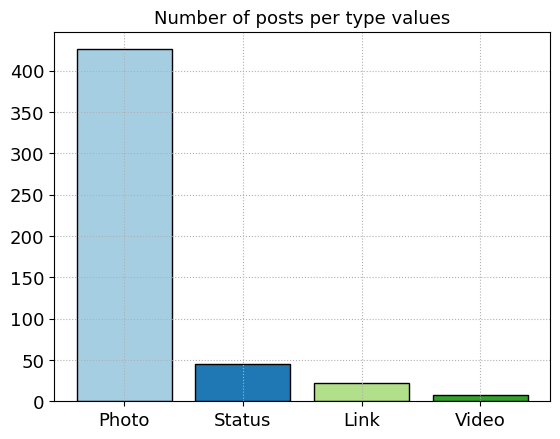

In [86]:
type_data = fb_df.Type.value_counts(sort=False, dropna=False)
plt.bar(x=type_data.index, height=type_data.values,
        color=plt.cm.Paired.colors, edgecolor='k')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Number of posts per type values', fontsize=13)
plt.grid(linestyle=':')
# plt.savefig('plots/number_posts_per_type_values.png', bbox_inches='tight');

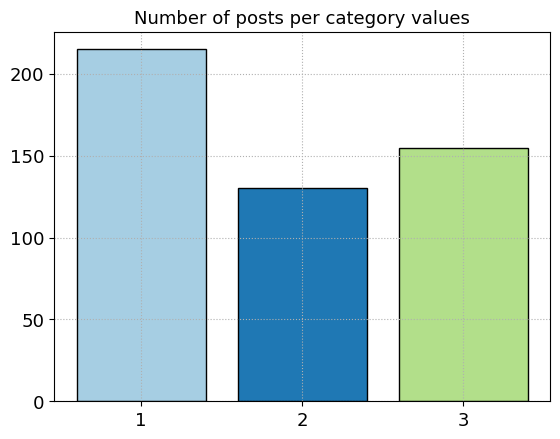

In [87]:
category_data = fb_df.Category.value_counts(sort=False, dropna=False).sort_index()
plt.bar(x=category_data.index, height=category_data.values,
        color=plt.cm.Paired.colors, edgecolor='k')
plt.xticks([1, 2, 3], fontsize=13)
plt.yticks(fontsize=13)
plt.title('Number of posts per category values', fontsize=13)
plt.grid(linestyle=':')
# plt.savefig('plots/number_posts_per_category_values.png', bbox_inches='tight');

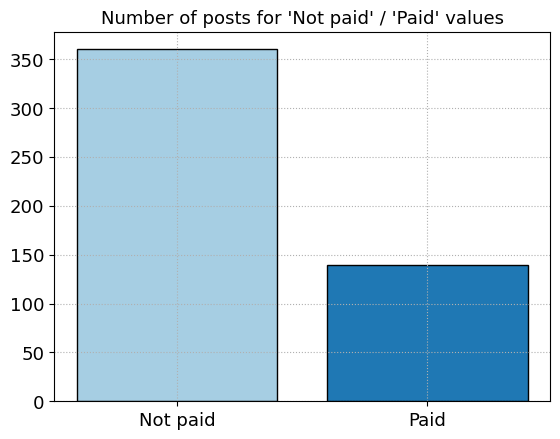

In [88]:
paid_data = fb_df.Paid.value_counts(sort=False, dropna=True).sort_index()
plt.bar(x=paid_data.index, height=paid_data.values,
        color=plt.cm.Paired.colors, edgecolor='k')
plt.xticks(ticks=paid_data.index, labels=['Not paid', 'Paid'], fontsize=13)
plt.yticks(fontsize=13)
plt.title('''Number of posts for 'Not paid' / 'Paid' values''', fontsize=13)
plt.grid(linestyle=':')
# plt.savefig('plots/number_posts_for_Paid_Not_paid_values.png', bbox_inches='tight');

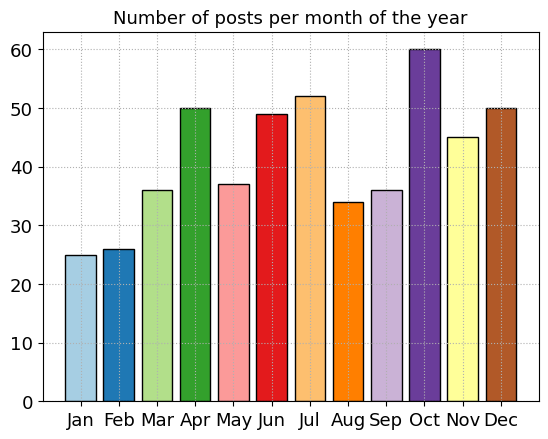

In [89]:
month_data = fb_df['Post Month'].value_counts(sort=False).sort_index()
plt.bar(x=month_data.index, height=month_data.values,
        color=plt.cm.Paired.colors, edgecolor='k')
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',\
        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=month_data.index, labels=months, fontsize=13)
plt.yticks(fontsize=13)
plt.title('Number of posts per month of the year', fontsize=13)
plt.grid(linestyle=':')
# plt.savefig('plots/number_posts_per_month_of__year.png', bbox_inches='tight');

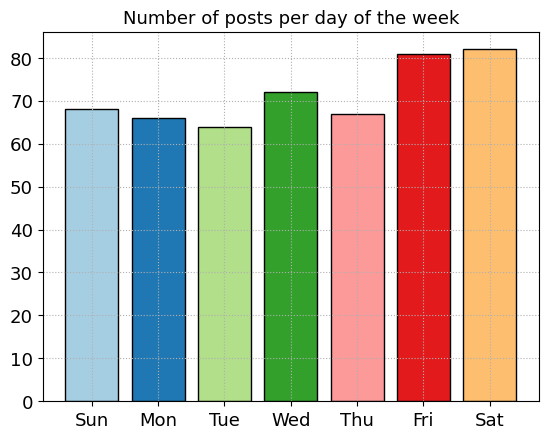

In [90]:
day_data=fb_df['Post Weekday'].value_counts(sort=False).sort_index()
plt.bar(x=day_data.index, height=day_data.values,
        color=plt.cm.Paired.colors, edgecolor='k')
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
plt.xticks(ticks=day_data.index, labels=days, fontsize=13)
plt.yticks(fontsize=13)
plt.title('Number of posts per day of the week', fontsize=13)
plt.grid(linestyle=':')
# plt.savefig('plots/number_of_posts_per_day_of_week.png', bbox_inches='tight');

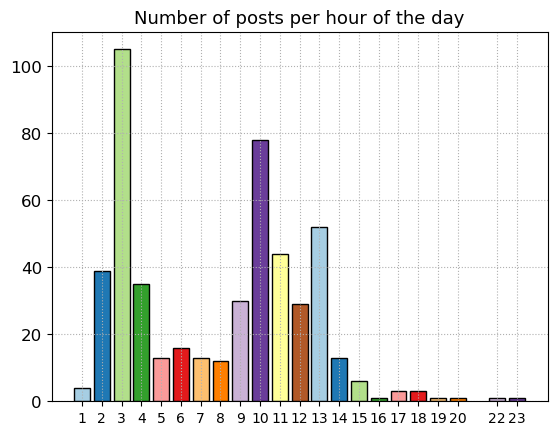

In [91]:
hour_data = fb_df['Post Hour'].value_counts(sort=False).sort_index()
plt.bar(x=hour_data.index, height=hour_data.values,
        color=plt.cm.Paired.colors, edgecolor='k')
plt.xticks(hour_data.index, fontsize=10)
plt.yticks(fontsize=12)
plt.title('Number of posts per hour of the day', fontsize=13)
plt.grid(linestyle=':')
# plt.savefig('plots/number_of_posts_per_hour_of_day.png', bbox_inches='tight');

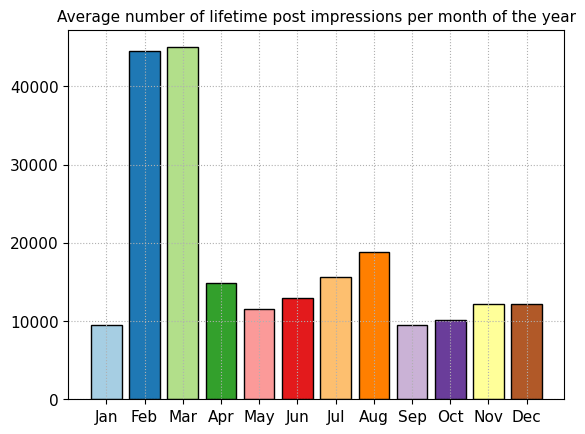

In [92]:
lt_post_imp_df=fb_df['LT Post Imp + Liked Page'].groupby(fb_df['Post Month']).mean()
plt.bar(x=lt_post_imp_df.index, height=lt_post_imp_df.values,
        color=plt.cm.Paired.colors, edgecolor='k')
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',\
        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=lt_post_imp_df.index, labels=months, fontsize=11)
plt.yticks(fontsize=11)
plt.title('Average number of lifetime post impressions per month of the year', fontsize=11)
plt.grid(linestyle=':')
# plt.savefig('plots/average_number_of_lifetime_post_consumers_per_month_of_year.png', bbox_inches='tight');

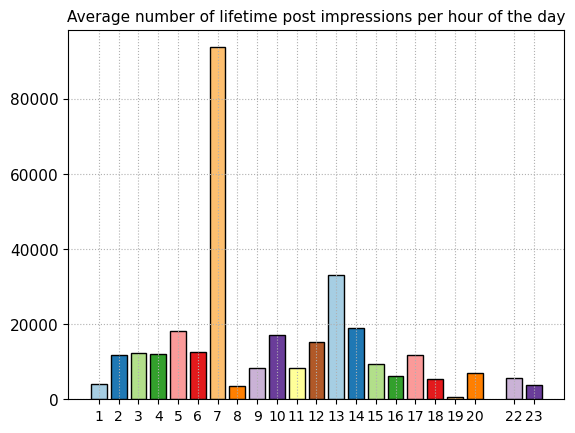

In [93]:
lt_post_imp_df=fb_df['LT Post Imp + Liked Page'].groupby(fb_df['Post Hour']).mean()
plt.bar(x=lt_post_imp_df.index, height=lt_post_imp_df.values,
        color=plt.cm.Paired.colors, edgecolor='k')
plt.xticks(ticks=lt_post_imp_df.index, fontsize=10)
plt.yticks(fontsize=11)
plt.title('Average number of lifetime post impressions per hour of the day', fontsize=11)
plt.grid(linestyle=':')
# plt.savefig('plots/average_number_of_lifetime_post_consumers_per_hour_of_day.png', bbox_inches='tight');

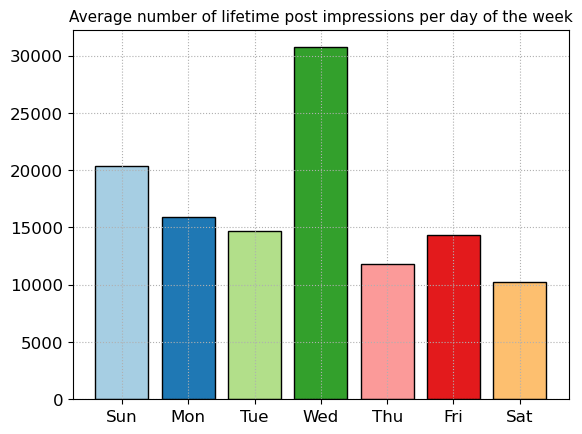

In [94]:
lt_post_imp_df=fb_df['LT Post Imp + Liked Page'].groupby(fb_df['Post Weekday']).mean()
plt.bar(x=lt_post_imp_df.index, height=lt_post_imp_df.values,
        color=plt.cm.Paired.colors, edgecolor='k')
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
plt.xticks(ticks=lt_post_imp_df.index, labels=days, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Average number of lifetime post impressions per day of the week', fontsize=11)
plt.grid(linestyle=':')
# plt.savefig('plots/average_number_of_lifetime_post_consumers_per_day_of_week.png', bbox_inches='tight');

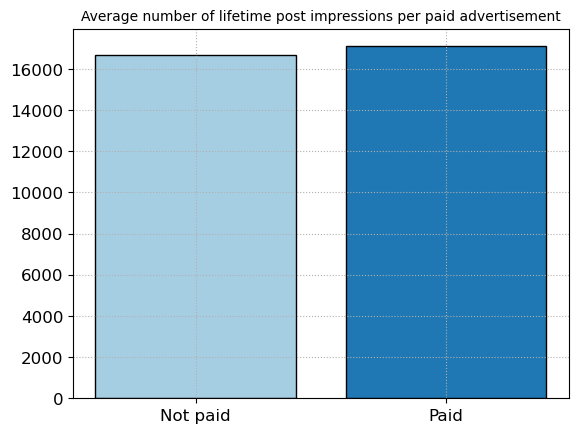

In [95]:
lt_post_imp_df=fb_df['LT Post Imp + Liked Page'].groupby(fb_df['Paid']).mean()
plt.bar(x=lt_post_imp_df.index, height=lt_post_imp_df.values,
        color=plt.cm.Paired.colors, edgecolor='k')
days = ['Not paid', 'Paid']
plt.xticks(ticks=lt_post_imp_df.index, labels=days, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Average number of lifetime post impressions per paid advertisement', fontsize=10)
plt.grid(linestyle=':')
# plt.savefig('plots/number_of_lifetime_post_consumers_per_paid_advertisement.png', bbox_inches='tight');

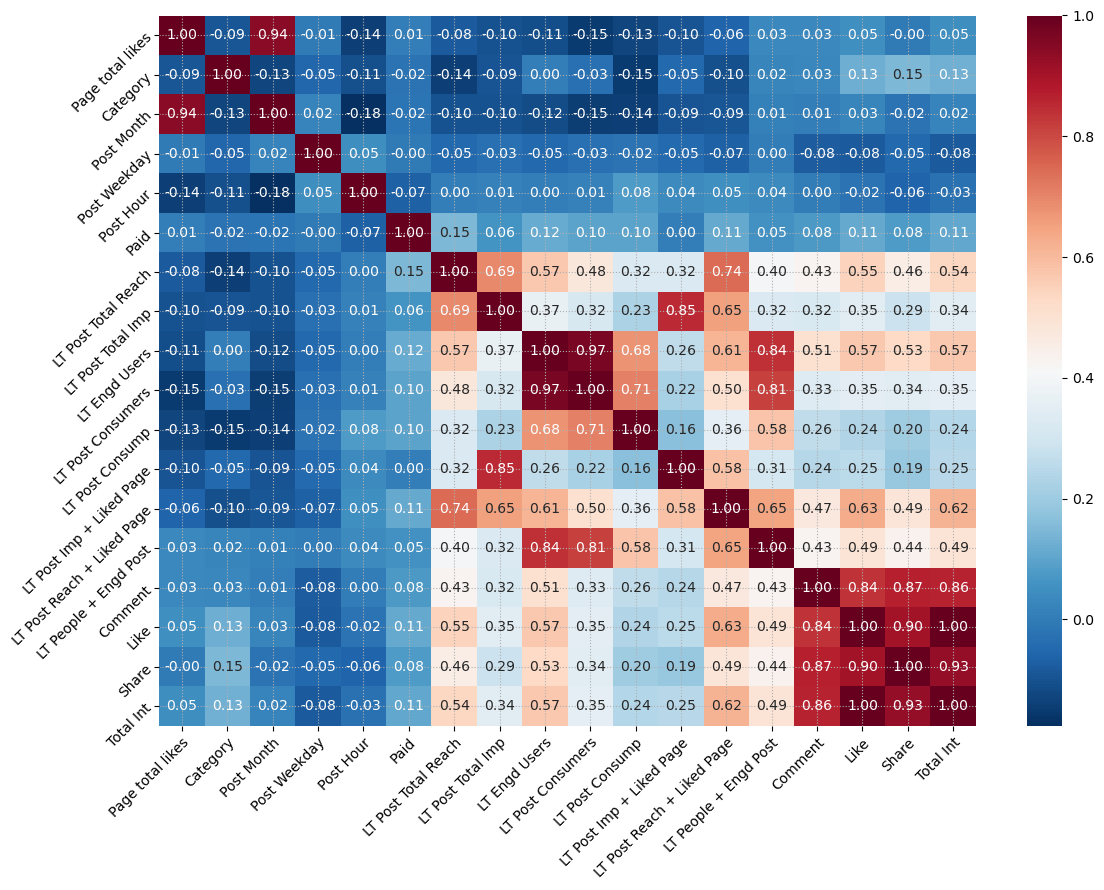

In [100]:
fig, axes = plt.subplots(figsize=(12, 9))
fontsize = 10
hm = sns.heatmap(data=fb_df.corr(numeric_only=float), cmap='RdBu_r',
                 ax=axes, annot=True, fmt='1.2f', annot_kws={'size':fontsize})
axes.tick_params(labelsize=fontsize)
cbar = hm.collections[0].colorbar
cbar.ax.tick_params(labelsize=fontsize)
plt.setp(axes.get_yticklabels(), ha='right', rotation_mode='anchor', rotation=45)
plt.setp(axes.get_xticklabels(), ha='right', rotation_mode='anchor', rotation=45)
plt.tight_layout()
plt.grid(True, linestyle=':')
plt.savefig('plots/correlation.png', bbox_inches='tight');

In [97]:
timePivot = pd.pivot_table(fb_df, aggfunc='median', columns='Post Hour',
                           index='Post Weekday', values='Like')
timePivot = timePivot[range(1, 21)]

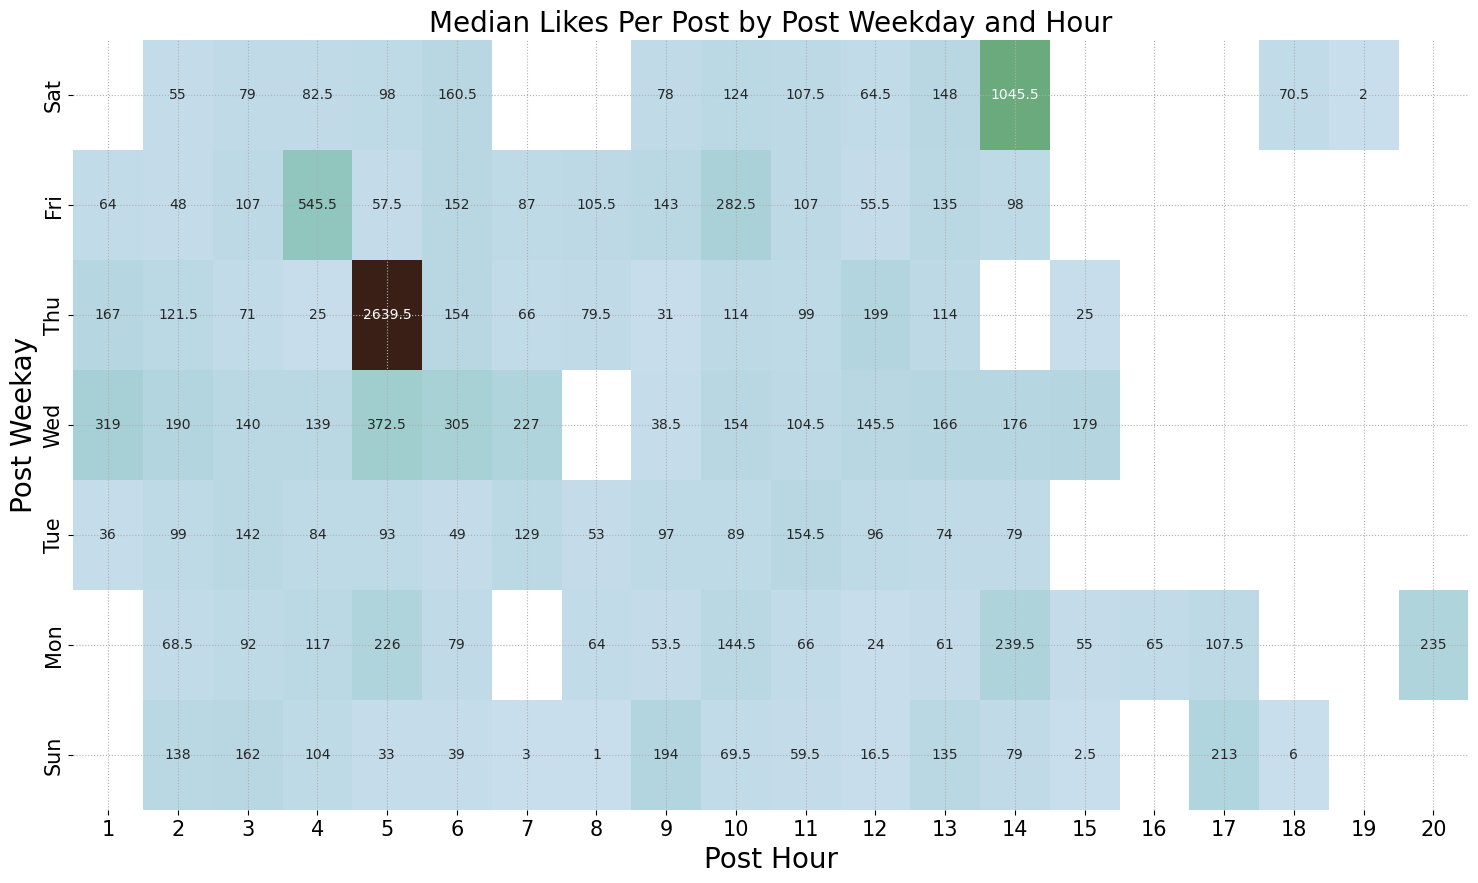

In [98]:
plt.figure(figsize=(18,10))
cmap = sns.cubehelix_palette(8, start=0.75, rot=0.75, as_cmap=True)
sns.heatmap(timePivot, cbar=False, cmap=cmap, annot=True, fmt='g')
plt.yticks(np.arange(0.5,7.5), ['Sat','Fri','Thu','Wed','Tue','Mon','Sun'],
           fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Post Hour', fontsize=20)
plt.ylabel('Post Weekay', fontsize=20)
plt.title('Median Likes Per Post by Post Weekday and Hour', fontsize=20)
plt.grid(linestyle=':')
# plt.savefig('plots/median_like_heatmap.png', bbox_inches='tight');